# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [24]:
import pandas as pd
import numpy as np
import scipy as scp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import test_Stats as ts
import resampler_Stat as rs

df = pd.read_csv('data/human_body_temperature.csv')

In [25]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


<div class="span5 alert alert-info">

**Q1.** Is the distribution of body temperatures normal? 
- Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
 

****
**A1: **

- As shown in the figure below, the sample distribution of the population of humon temperature is likely (but not completely) to normal distribution. A **positive skewness** can be seen in the sample histogram in comparison to normal distribution. To judge if the real population distribution, much more sample's needed.

- The scipy API, 'stats.normaltest', tests the null hypothesis that a sample comes from a normal distribution. The function returns a combincation of kurtosis and skewnes in addition to pvalue of the null hypothesis testing. The result of this null hypothesis is shows more than 29% chance, so the assumption of coming out from a normal distribution cannot be rejected. However the pvalue is not a large value, therefor the certainity of the assumption is not high.

#### sample distribution of the human's temperature:

The distribution is likely to normal distribution with a positive skewness.

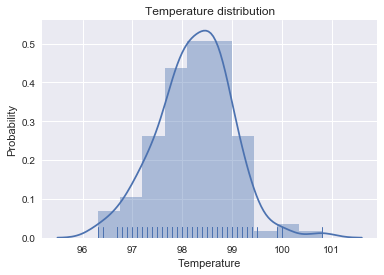

In [26]:
#removing duplicated data to make observation independant
#the sample distribution has some similarity to normal distribution, but it has positive skewness
temp = df.drop_duplicates(keep='first').reset_index()
sns.distplot(temp.temperature, rug=True, bins=10)
plt.xlabel('Temperature')
plt.ylabel('Probability')
plt.title('Temperature distribution')

Testing the normality using **stats.normaltest()**

29% chance for the temperature sample to be from a normal distribution.

In [27]:
stats.normaltest(temp.temperature)

NormaltestResult(statistic=2.4305227728869379, pvalue=0.29663246845382457)

<div class="span5 alert alert-info">

**Q2. **Is the sample size large? Are the observations independent?
- Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
****

**A2:**

- To see the dependency in observation data, we seek for data points with the same values for all of their columns. So, here we search if there is some data with the same gender, temperature and heart rate, and remove these duplicated rows. As shown in the first figure below, there are 3 duplicate pairs in the original data, but all of them are removed after refining data, as shown in the next figure.


- After refining the sample by dropping duplicates out, there is still 127 data in the batch.


- Now we can be sure enough that the CLT condition is satisfied, as the sample size is greater than 30 and the observations are independent.

#### Observation dependency:

Repeatition of data points in Original data and Refined data. In Refined data the duplicted points are removed.

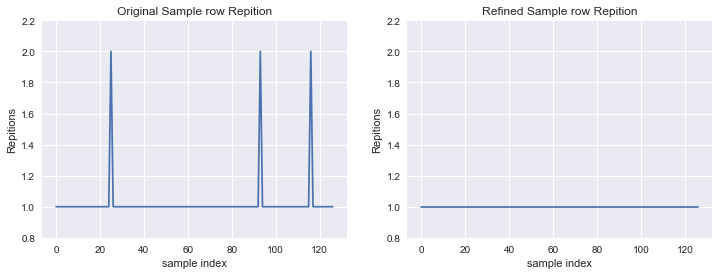

In [28]:
# Finding the duplicate data using plot
figure, axes = plt.subplots(1,2, figsize=[12,4])
group_orig = df.groupby(['gender', 'temperature', 'heart_rate']).size()
axes[0].plot(range(len(group_orig)), group_orig)
axes[0].set_ylim([0.8,2.2])
axes[0].set_xlabel('sample index')
axes[0].set_ylabel('Repitions')
axes[0].set_title('Original Sample row Repition')

# checking the dependency of data (duplicate values)
temp = df.drop_duplicates()
group_refined = temp.groupby(['gender', 'temperature', 'heart_rate']).size()
axes[1].plot(range(len(group_refined)), group_refined)
axes[1].set_ylim([0.8,2.2])
axes[1].set_xlabel('sample index')
axes[1].set_ylabel('Repitions')
axes[1].set_title('Refined Sample row Repition')

In [29]:
print 'Original data Sample Size: %d' % len(df)
print 'Refined data Sample Size:  %d' % len(temp)

Original data Sample Size: 130
Refined data Sample Size:  127


<div class="span5 alert alert-info">

**Q3.** Is the true population mean really 98.6 degrees F?

- Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the $t$ or $z$ statistic?
- Now try using the other test. How is the result be different? Why? 

***

**A3:**

- For this hypothesis testing, **one-sample** test must be used, as we have one sample to be compared and analyzed statistically.


- As we know t-test is used for small sample size *(n<30)* and z-test for large sample size *(n>30)*. On the other hand, when the sample size is much more than 30, it's expected for both methods to have close results. So, although it's prefered to use z-test because the sample size is more than 30, but we must get reasonable results with t-test. As seen in the results related to Confidence intervals and p_values, both t-test and z-test have results close to each other.

- To check, if the average temperature of the real population is the assumed value, 98.6 F, we hold up a hypothesis test using the concept of NHST. for this we consider null and alternative hypothesises as below:
    
    $H_0: \bar{\theta} = 98.6$
    
    $H_a: \bar{\theta} \neq 98.6$
    
    Assuming the $H_0$ is true, we consider a normal distibution for sample mean random variable, with the mean ($\mu_\bar{\theta}$) of 98.6 and the estimated standard deviation($\sigma_\bar{\theta}=0.065395$). with this hypothesis the probability of having a sample with sample mean ($\mu_\theta$) of 98.247244 can be computed using z-test. Note that t-test must have a close result to z-test. This probability is computed to be p_value $\simeq 0$ for both tests. So, the null hypothesis $H_0$, assuming the average human's temperature to be 98.6 is rejected.

Sample Statistics and estimate Std of sample mean are generated by instantiation of hypothesisTest_oneSample object

In [30]:
temp_hypo = ts.hypothesisTest_oneSample(temp.temperature)

sample size: 127
sample_mean: 98.247244
sample_std:  0.736968
SE(sample_mean std): 0.065395


p_value is computed close to zero, so the under null-Hypothesis is rejected.

In [31]:
_, pValue_zTest = temp_hypo.pValue_zTest(98.6)
print 'z-test pValue for H0: %f%%' % (pValue_zTest*100)

_, pValue_tTest = temp_hypo.pValue_tTest(98.6)
print 't_test pValue for H0: %f%%' % (pValue_tTest*100)

# pvalue evaluation by scipy
temp_tStats_api = scp.stats.ttest_1samp(temp.temperature, 98.6)
print 't-test pValue for H0 using scipy API: %f%%' % (temp_tStats_api.pvalue*100)

z-test pValue for H0: 0.000007%
t_test pValue for H0: 0.000033%
t-test pValue for H0 using scipy API: 0.000036%


<div class="span5 alert alert-info">

**Q4. **At what temperature should we consider someone's temperature to be "abnormal"?

- Start by computing the margin of error and confidence interval. 
***
**A4:**
- Using the computed sample statistics, mean ($\mu_\theta = 98.247244$) and standard deviation ($\sigma_\theta = 0.736968$), and estimating the population standard deviation with sample standard deviation, now, we can compute a 99% confidence interval for population mean, or the population average human's temperature. As shown below, the 99% confidence interval is computed [98.0787968,   98.41569139] using z-test and [98.07620826,  98.41827992] using t-test. The marginal error is computed 0.168447 and 0.171036 for z-test and t-test respectively.


- To check if the computations mentioned above is true, a simulation based on resampling method is held up to compute the 99% confidence interval. As seen the simulation interval is [98.0999685,   98.39690551] close to theoretical results.


- Having the 99% confidence interval we assume the temperatures out of this bound as abnormal temperatures for human body. So, the temperature greater than 98.42 F and lower than 98.08 F could be considered as abnormal temperatures.

The theoretical approach is used to compute 99% Confidence Interval of population mean using z-test and t-test:

In [32]:
pcg = 99
CI_zTest, ME_zTest = temp_hypo.CI_zTest(pcg)
print 'z-test %d%% CI: ' % pcg + str(CI_zTest)
print 'z-test %d%% ME: %f' % (pcg, ME_zTest)

CI_tTest, ME_tTest = temp_hypo.CI_tTest(pcg)
print 't-test %d%% CI: ' % pcg + str(CI_tTest)
print 't-test %d%% ME: %f' % (pcg, ME_tTest)

z-test 99% CI: [ 98.0787968   98.41569139]
z-test 99% ME: 0.168447
t-test 99% CI: [ 98.07620826  98.41827992]
t-test 99% ME: 0.171036


99% Confidence Interval and population distribution is computed by Resampling:

It's very cool that Simulation and Theoretical approaches have close results.

 sample_stats mean: 98.246740
 sample_stats std:  0.063249
 99% sample_stats mean: [ 98.0960315  98.3874252]


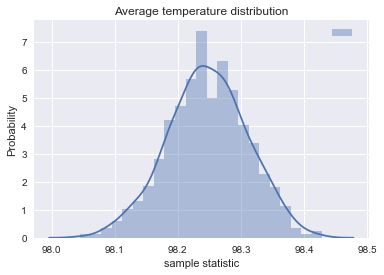

In [33]:
temp_resampler = rs.Resampler(temp.temperature, title='Average temperature distribution')
temp_resampler.plot_sample_stats(pcg)

<div class="span5 alert alert-info">
**Q5.**
Is there a significant difference between males and females in normal temperature?
- What test did you use and why?
- Write a story with your conclusion in the context of the original problem.

****

**A5.**

<ol>
<li> Effect size:</li>
<ul>
<li> By seperating the sample based on male and female, we can check the statistics of men's and women's temperature independently. The first look shows a difference in average temperature of two groups. The sample mean for men's and women's temperature are 98.095238 and 98.396875 respectively. So it's reasonable to investigate if 0.3 F difference can be seen in average temperature of men and women.</li>
<li> The Analysis based on Simulation also shows that the sample mean distribution of Men's and Woman's temperature are separable. However, the same analysis for heart rate shows that the heart rate distribution of men and women is not well separable.</li>
</ul>


<li> Confidence Interval:</li>
<ul>
<li> With respect to sample size larger than 30, the best solution to compute confidence interval is to use z-test, however the t-test also has a close result to z-test.The 95% confidence interval for expected difference sample mean is computed via z-test as shown below:
<br><br>
$ 95\% CI = [-0.55244308, -0.05083073] $
<br><br>
The negative 95% CI states that expected sample mean value for men's temperature is lower than one's for women.

</li>
</ul> 

<li> Hypotheis Test:</li>
<ul>
<li> To check wether this temperature difference is a probable occurance or not, we hold up a Hypothesis test, with the null and alternative assumptions as below:
<br><br>
$H_0: \bar\theta_m = \bar\theta_w$
<br>
$H_a: \bar\theta_m < \bar\theta_w$
<br><br>
    
For this problem, as the sample size of each group is more than 30, so we use z-test. However, as before, for large sample size, t-test might have close results to z-test.
<br>
The computations for both z-test and t-test show the p_value $<$ 1%, meaning: under null hypothesis less than 1% chance exists to have a sample with such statistics we got. Therefore, reasonably the null hypothesis is rejected, and the alternative hypothesis, 0.3 F women's greater temperature by average, is approved.</li>
</ul>


<li> Sanity Check:
<ul>
<li>There might be some suspect about the above result. The temperature difference might be refered to differences in heart rates. Therefore we hold up another hypothesis test to check if there is meaningful difference in men's and women's heart rate:

$H_0: \bar{HR_m} = \bar{HR_w}$    
$H_a: \bar{HR_m} \neq \bar{HR_w}$
    
Under null hypothesis, the p_value is computed more than 44%. So, the null hypothesis can not be rejected, and the average temperature difference between men and women can not be refered to a meaningful difference in their heart rate. In fact this test is done to check if a notable bias in sampling could be seen.</li>
</ul>
</ol>


In [34]:
temp_men = temp.temperature[df.gender=='M'].values
temp_women = temp.temperature[df.gender=='F'].values
hr_men = temp.heart_rate[df.gender=='M'].values
hr_women = temp.heart_rate[df.gender=='F'].values

### Simulation based Analysis

Comparison of estimated population distribution and Statistics of Men's and Women's temperature. A meaningful difference can be seen.

Men sample_stats mean: 98.091216
Men sample_stats std:  0.086919
Men 95% sample_stats mean: [ 97.94603175  98.2375    ]
Women sample_stats mean: 98.399630
Women sample_stats std:  0.096501
Women 95% sample_stats mean: [ 98.2334127  98.5640625]


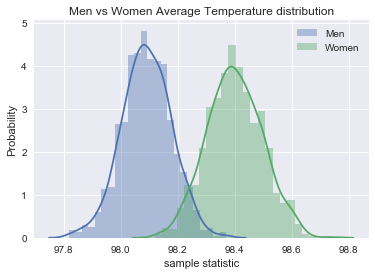

In [35]:
resampler_wm = rs.Resampler_new([temp_men, temp_women], 
                             legend=['Men', 'Women'],
                             title='Men vs Women Average Temperature distribution')
stats = resampler_wm.plot_sample_stats(95)

Comparison of estimated population distribution and Statistics of Men's and Women's Heart Rate. In conterary to temperature, the Heart Rate distributions are highly overlapping.

Men sample_stats mean: 73.198492
Men sample_stats std:  0.739917
Men 95% sample_stats mean: [ 72.01587302  72.46796875]
Women sample_stats mean: 74.135781
Women sample_stats std:  1.028202
Women 95% sample_stats mean: [ 74.3968254   75.87578125]


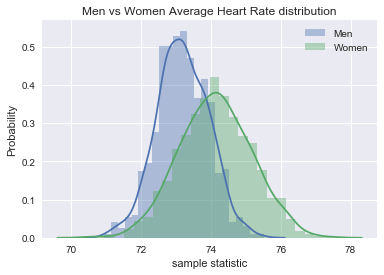

In [36]:
resampler_wm = rs.Resampler_new([hr_men, hr_women], 
                             legend=['Men', 'Women'],
                             title='Men vs Women Average Heart Rate distribution')
resampler_wm.plot_sample_stats(95)

### Theoretical Analysis

Sample and difference sample mean Statistics are computed by DiffMeanhypothesisTest_twoSample class.

In [37]:
mwtemp_hypo = ts.DiffMeanhypothesisTest_twoSample(temp_men, temp_women, legends=['Men', 'Women'])

Men sample size: 63
Men sample_mean: 98.095238
Men sample_std:  0.698622
Men sample_mean std: 0.088018
Women sample size: 64
Women sample_mean: 98.396875
Women sample_std:  0.743087
Women sample_mean std: 0.092886
Difference Sample_mean: -0.301637
Difference Sample_mean Std: 0.127965


p_value is computed less than 1% under null-Hypothesis. So it's rejected and the assumption existing a difference between Men's and Women's is accepted.

In [38]:
pValue_zTest, _ = mwtemp_hypo.pValue_zTest(0)
print 'z-test pValue for H0(equal mean temp for Men and Women): %f' % pValue_zTest

pValue_tTest, _ = mwtemp_hypo.pValue_tTest(0)
print 't-test pValue for H0(equal mean temp for Men and Women): %f' % pValue_tTest

# One-tailed relative ttest using scipy
# note: scipy computed two-tailed pvalue, so the pvalue must be devided by 2 to get one-tailed pvalue
temp_rel_tStats_api = scp.stats.ttest_ind(temp_men, temp_women, equal_var=False)
print 't-test pValue for H0(equal mean temp for Men and Women) using scipy API: %f' % (temp_rel_tStats_api.pvalue/2)

z-test pValue for H0(equal mean temp for Men and Women): 0.009207
t-test pValue for H0(equal mean temp for Men and Women): 0.009984
t-test pValue for H0(equal mean temp for Men and Women) using scipy API: 0.010474


Also the computed 95% Confidence Interval is negative. 

In [39]:
pcg = 95

CI_zTest, ME_zTest = mwtemp_hypo.CI_zTest(pcg)
print 'z-test %d%% CI for average difference temperature of Men and Women: ' % pcg + str(CI_zTest)
print 'z-test %d%% ME for average difference temperature of Men and Women: %f' % (pcg, ME_zTest)

CI_tTest, ME_tTest = mwtemp_hypo.CI_tTest(pcg)
print 't-test %d%% CI for average difference temperature of Men and Women: ' % pcg + str(CI_tTest)
print 't-test %d%% ME for average difference temperature of Men and Women: %f' % (pcg, ME_tTest)

z-test 95% CI for average difference temperature of Men and Women: [-0.55244308 -0.05083073]
z-test 95% ME for average difference temperature of Men and Women: 0.250806
t-test 95% CI for average difference temperature of Men and Women: [-0.5548949  -0.04837891]
t-test 95% ME for average difference temperature of Men and Women: 0.253258


##  Heart Rate statistics

Sample and difference sample mean Statistics are computed for Men's and Women's Heart Rate by DiffMeanhypothesisTest_twoSample class.

In [40]:
mwHR_hypo = ts.DiffMeanhypothesisTest_twoSample(hr_men, hr_women, legends=['Men', 'Women'])

Men sample size: 63
Men sample_mean: 73.222222
Men sample_std:  5.862023
Men sample_mean std: 0.738545
Women sample size: 64
Women sample_mean: 74.171875
Women sample_std:  8.103924
Women sample_mean std: 1.012990
Difference Sample_mean: -0.949653
Difference Sample_mean Std: 1.253634


The computed 95% Confidence Interval is not pure positive or negative. 

In [41]:
pcg = 95

CI_zTest, ME_zTest = mwHR_hypo.CI_zTest(pcg)
print 'z-test %d%% CI for average difference Heart rate of Men and Women: ' % pcg + str(CI_zTest)
print 'z-test %d%% ME for average difference Heart rate of Men and Women: %f' % (pcg, ME_zTest)

CI_tTest, ME_tTest = mwHR_hypo.CI_tTest(pcg)
print 't-test %d%% CI for average difference Heart rate of Men and Women: ' % pcg + str(CI_tTest)
print 't-test %d%% ME for average difference Heart rate of Men and Women: %f' % (pcg, ME_tTest)

z-test 95% CI for average difference Heart rate of Men and Women: [-3.40673105  1.50742549]
z-test 95% ME for average difference Heart rate of Men and Women: 2.457078
t-test 95% CI for average difference Heart rate of Men and Women: [-3.43075084  1.53144528]
t-test 95% ME for average difference Heart rate of Men and Women: 2.481098


p_value is computed higher than 44%, so the null-Hypothesis is not rejected.

In [42]:
_, pValue_zTest = mwHR_hypo.pValue_zTest(0)
print 'z-test pValue for H0(equal mean temp for Men and Women): %f' % pValue_zTest

_, pValue_tTest = mwHR_hypo.pValue_tTest(0)
print 't-test pValue for H0(equal mean temp for Men and Women): %f' % pValue_tTest

HR_tStats_rel = scp.stats.ttest_ind(hr_men, hr_women)
print 't-test pValue for H0(equal mean temp for Men and Women) using scipy API: %f' % HR_tStats_rel.pvalue

z-test pValue for H0(equal mean temp for Men and Women): 0.448739
t-test pValue for H0(equal mean temp for Men and Women): 0.450164
t-test pValue for H0(equal mean temp for Men and Women) using scipy API: 0.454855


The scatter plot don't show a meaningful correlation between Temperature and Heart Rate. Also, there is no seperable clusters for Male and Female.

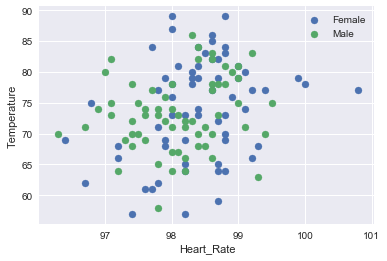

In [43]:
plt.scatter(temp.temperature[df.gender=='F'], temp.heart_rate[df.gender=='F'])
plt.scatter(temp.temperature[df.gender=='M'], temp.heart_rate[df.gender=='M'])
plt.xlabel('Heart_Rate')
plt.ylabel('Temperature')
plt.legend(['Female', 'Male'])